<a href="https://colab.research.google.com/github/meddeb23/classification_crises_epilepsie/blob/main/kears_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv1D, MaxPooling1D,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
import numpy

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


import tensorflow as tf
print(tf.__version__)

import numpy as np
print(np.__version__)

numpy.random.seed(2)
import pandas as pd

2.8.0
1.21.5


In [2]:
config = tensorflow.compat.v1.ConfigProto()
sess = tensorflow.compat.v1.Session(config=config)

In [6]:
dataset_e1= pd.read_csv("./stand_norm_e1.txt",delimiter=" ",header=None)
dataset_e1=numpy.array(dataset_e1,float)

X_e1 = dataset_e1[:,:8]
#m=np.max(X_e1)
print(X_e1.shape)
dataset_e2= pd.read_csv("./stand_norm_e2.txt",delimiter=" ",header=None)
dataset_e2=numpy.array(dataset_e2,float)

X_e2 = dataset_e2[:,:8]
#n=np.max(X_e2)
#X_e2=X_e2/n
print(X_e2.shape)
x_train_test=np.zeros((X_e1.shape[0],X_e1.shape[1],2))
x_train_test[:,:,0]=X_e1
x_train_test[:,:,1]=X_e2
print(x_train_test.shape)
#print(x_test.shape)
dataset_output= pd.read_csv("./y2_e1.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )

(13762, 8)
(13762, 8)
(13762, 8, 2)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.15, random_state=42)

In [8]:
x_train_new=x_train
x_test_new=x_test

In [9]:
print(x_train_new.shape)
print(y_train.shape)

Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)

(11697, 8, 2)
(11697,)
(11697, 3)


In [10]:
print (x_train_new.shape)
x_train_new=x_train_new.reshape(x_train_new.shape[0],  x_train_new.shape[1], 2)
x_test_new = x_test_new.reshape(x_test_new.shape[0], x_test_new.shape[1],2 )
print (x_train_new.shape)

(11697, 8, 2)
(11697, 8, 2)


In [12]:
print(x_train_new[50])

[[606.096047 279.596588]
 [  6.725553   5.081766]
 [ 13.935761  14.926257]
 [ 55.067419  17.357456]
 [173.842822  15.367078]
 [146.524492 196.86403 ]
 [  0.898929   0.898929]
 [  0.670072   1.078618]]


In [27]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3,
                 activation='relu',data_format="channels_last",padding='same',
                 input_shape=(8,2)))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2,strides=None))
model.add(Dropout(0.3))#0.1
model.add(Conv1D(512, 3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2,strides=None))
model.add(Dropout(0.4))#0.1
model.add(Flatten()) # Flatten is the input layer of the Fully Connected
model.add(Dense(100, activation='relu')) # gets input size from flatten
model.add(BatchNormalization())
model.add(Dropout(0.4))#0.2
model.add(Dense(3, activation='softmax'))
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 8, 32)             224       
                                                                 
 batch_normalization_12 (Bat  (None, 8, 32)            128       
 chNormalization)                                                
                                                                 
 conv1d_13 (Conv1D)          (None, 8, 64)             6208      
                                                                 
 batch_normalization_13 (Bat  (None, 8, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 4, 64)            0         
 1D)                                                             
                                                      

In [64]:
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
def model(alpha = 0.001):
    model = Sequential()
    model.add(LSTM(56, input_shape=(8,2), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(LSTM(56))
    model.add(Dropout(0.4))
    model.add(Dense(80))
    model.add(Activation('relu'))
    model.add(Dense(100))
    # model.add(Activation('softmax'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
                  optimizer=tensorflow.keras.optimizers.Adam(learning_rate=alpha),
                  metrics=['accuracy'])
    model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 8, 56)             13216     
                                                                 
 dropout_27 (Dropout)        (None, 8, 56)             0         
                                                                 
 batch_normalization_19 (Bat  (None, 8, 56)            224       
 chNormalization)                                                
                                                                 
 lstm_13 (LSTM)              (None, 56)                25312     
                                                                 
 dropout_28 (Dropout)        (None, 56)                0         
                                                                 
 dense_28 (Dense)            (None, 80)                4560      
                                                     

In [65]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=150, batch_size=512, verbose=1, validation_split=0.2, callbacks=[checkpointer])

model.save('weights_cnn2.h5')

Epoch 1/150
18/19 [===========================>..] - ETA: 0s - loss: 0.8195 - accuracy: 0.5920
Epoch 1: val_loss improved from inf to 0.72844, saving model to ./_best_weights.h5
19/19 [==============================] - 6s 119ms/step - loss: 0.8170 - accuracy: 0.5922 - val_loss: 0.7284 - val_accuracy: 0.6321
Epoch 2/150
18/19 [===========================>..] - ETA: 0s - loss: 0.6740 - accuracy: 0.6578
Epoch 2: val_loss improved from 0.72844 to 0.70468, saving model to ./_best_weights.h5
19/19 [==============================] - 1s 69ms/step - loss: 0.6731 - accuracy: 0.6588 - val_loss: 0.7047 - val_accuracy: 0.5863
Epoch 3/150
18/19 [===========================>..] - ETA: 0s - loss: 0.6506 - accuracy: 0.6762
Epoch 3: val_loss improved from 0.70468 to 0.67790, saving model to ./_best_weights.h5
19/19 [==============================] - 1s 70ms/step - loss: 0.6498 - accuracy: 0.6769 - val_loss: 0.6779 - val_accuracy: 0.6355
Epoch 4/150
18/19 [===========================>..] - ETA: 0s - loss

In [66]:
score = model.evaluate(x_test_new, Y_test_new, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

65/65 [==============================] - 0s 4ms/step - loss: 0.3308 - accuracy: 0.8605
Test loss: 0.3307717740535736
Test accuracy: 0.8605327010154724


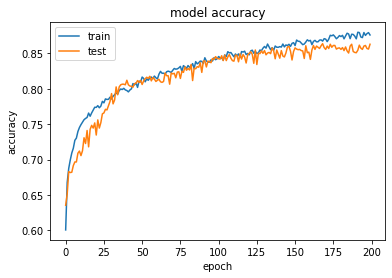

In [61]:
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

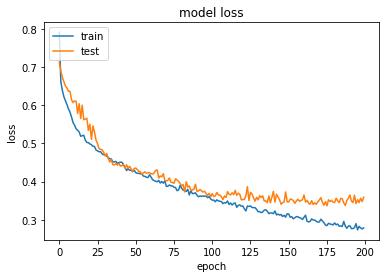

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
predictions = model.predict(x_test_new, batch_size=32, verbose=2)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)

65/65 - 1s - 993ms/epoch - 15ms/step
predicted images size : (2065, 3)
[[9.9983835e-01 1.6002438e-04 1.5376880e-06]
 [3.0815166e-01 6.9155723e-01 2.9110076e-04]
 [9.8948157e-01 1.0512369e-02 6.0564839e-06]
 ...
 [9.9927586e-01 5.8464694e-04 1.3944696e-04]
 [1.2234360e-03 9.9877661e-01 5.2752016e-09]
 [9.9982125e-01 1.6360865e-04 1.5109559e-05]]
(2065, 3)


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
for i in range(predictions.shape[0]):
    
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
#print(y_pred)
    
       
confusion = confusion_matrix(y_test,  y_pred)
print (confusion)


Confusion matrix:  Custom threshold (for positive) of 0.5
[[782 197   1]
 [118 936   2]
 [  5   7  17]]


In [63]:
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred) )
recall=recall_score(y_test,  y_pred, average=None)
av_recall=sum(recall)/3
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred,average=None)
av_precision=sum(precision)/3

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

The accuracy score on this random test-set is  : 0.8401937046004843
recall [0.79795918 0.88636364 0.5862069 ] the avreage recall is  0.7568432388629432
precision [0.8640884  0.82105263 0.85      ] the avreage precision is  0.8450470097896675
F1_score 0.7985167728171312
